d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


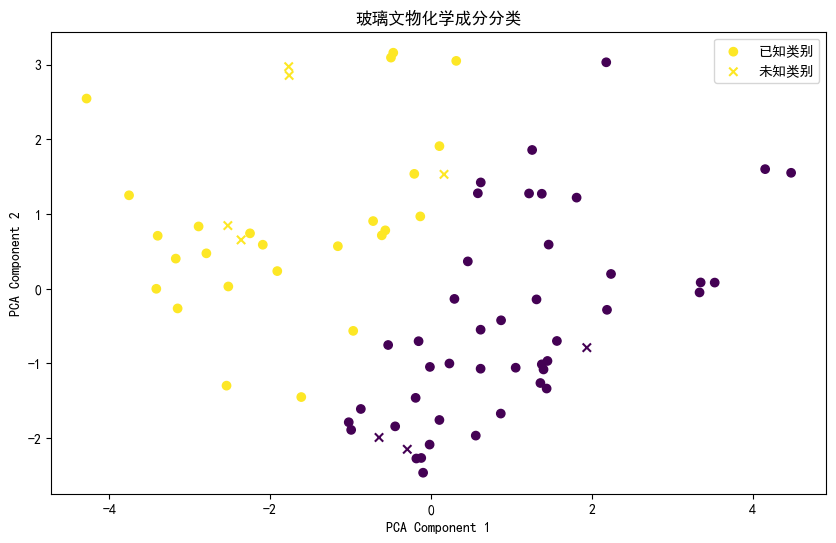

'./分类结果.xlsx'

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 读取数据
file_path = './附件.xlsx'
sheet_known = '表单2'  # 已分类玻璃文物的化学成分比例
sheet_unknown = '表单3'  # 未分类玻璃文物的化学成分比例

known_data = pd.read_excel(file_path, sheet_name=sheet_known)
unknown_data = pd.read_excel(file_path, sheet_name=sheet_unknown)

# 数据预处理：填充缺失值为0
known_data.fillna(0, inplace=True)
unknown_data.fillna(0, inplace=True)

# 确保已知和未知数据的列名一致
common_columns = known_data.columns.intersection(unknown_data.columns)
X_known = known_data[common_columns].iloc[:, 2:]
X_unknown = unknown_data[common_columns].iloc[:, 2:]

# 数据标准化
scaler = StandardScaler()
X_known_scaled = scaler.fit_transform(X_known)
X_unknown_scaled = scaler.transform(X_unknown)

# 使用PCA进行降维
pca = PCA(n_components=2)
X_known_pca = pca.fit_transform(X_known_scaled)
X_unknown_pca = pca.transform(X_unknown_scaled)

# 使用K-Means进行聚类，预期分类为2类（高钾玻璃和铅钡玻璃）
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_known_pca)
predictions = kmeans.predict(X_unknown_pca)

# 解决中文乱码问题
# 替换字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 结果可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_known_pca[:, 0], X_known_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', label='已知类别')
plt.scatter(X_unknown_pca[:, 0], X_unknown_pca[:, 1], c=predictions, cmap='viridis', marker='x', label='未知类别')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('玻璃文物化学成分分类')
plt.show()

# 输出分类结果
unknown_data['Predicted Class'] = predictions
output_path = './分类结果.xlsx'
unknown_data.to_excel(output_path, index=False)

output_path
